# SMI data analysis with Python
**Authors**:<br>Marlon Marzer, marlon.marzer@stud.hslu.ch<br>Dario Schürch, dario.schuerch@hslu.ch<br>
**Lecturer**:<br>Simon Broda, simon.broda@hslu.ch

In [52]:
https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

#Cheatsheet wie man Folie auf Jupyter erstellt, nur als Hilfe

SyntaxError: invalid syntax (Temp/ipykernel_36556/3063973600.py, line 1)

## Kurzer Beschrieb was wir im File machen? / Inhaltsverzeichnis?

Idee: Vergleich von im SMI während der Finanazkrise und der COVID-Pandemie 


- X
- X

### Get the Data

In [29]:
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

start = datetime(2004,1,1)
end = datetime.today()
SMI= yf.download("^SSMI", start, end)

SMI.to_csv("SMI_ALL.csv")



[*********************100%***********************]  1 of 1 completed


In [54]:
#Erst noch bisschen zeigen, dass wir mit Daten umgehen können mit groupby oder so

# Moving Average of ......... 50 Day / 200 Day Base 2004-2022

Text(0.5, 1.0, 'SMI 2004-2022: Moving Average of a 50 and 200 Day Base')

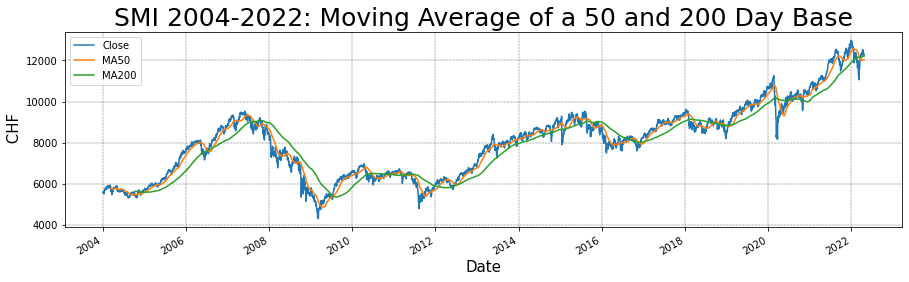

In [44]:
#Gleitender Mittelwert 50 / 200 2004 - 2022
SMI["MA50"] = SMI["Close"].rolling(50).mean()
SMI["MA200"] = SMI["Close"].rolling(200).mean()
SMI["Close"].plot(figsize = (15,4))
SMI["MA50"].plot()
SMI["MA200"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("SMI 2004-2022: Moving Average of a 50 and 200 Day Base", fontsize = 25)

# Moving Average of ......... 50 Day / 200 Day Base 2008-2010

### Get the Data

In [33]:
#get the data
start = datetime(2008,1,1)
end = datetime(2010,12,12)
SMI_08= yf.download("^SSMI", start, end)
SMI_08.to_csv("SMI_08.csv")



[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SMI 2008-2010: Moving Average of a 50 and 100 Day Base')

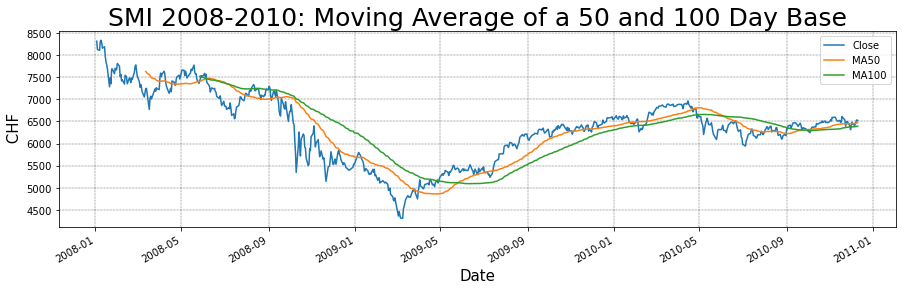

In [45]:
#plot
SMI_08 ["MA50"] = SMI_08["Close"].rolling(50).mean()
SMI_08 ["MA100"] = SMI_08["Close"].rolling(100).mean()
SMI_08["Close"].plot(figsize = (15,4))
SMI_08["MA50"].plot()
SMI_08["MA100"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("SMI 2008-2010: Moving Average of a 50 and 100 Day Base", fontsize = 25)


# Moving Average of ......... 50 Day / 200 Day Base 2020-2022

### Get the Data

In [37]:
start = datetime(2019,1,1)
end = datetime(2021,12,31)
SMI_19= yf.download("^SSMI", start, end)

SMI_19.to_csv("SMI_19.csv")




[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Moving Average of a 50 and 100 Day Base SMI 2019-2021')

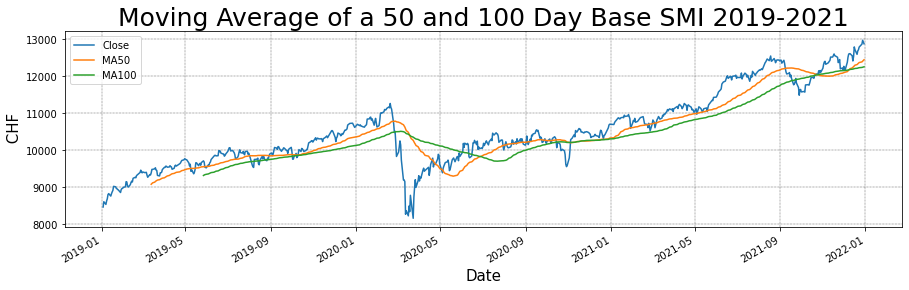

In [46]:
SMI_19["MA50"] = SMI_19["Close"].rolling(50).mean()
SMI_19["MA100"] = SMI_19["Close"].rolling(100).mean()
SMI_19["Close"].plot(figsize = (15,4))
SMI_19["MA50"].plot()
SMI_19["MA100"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.ylabel(" CHF", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("Moving Average of a 50 and 100 Day Base SMI 2019-2021", fontsize = 25)





## Mittelwert als Kennzahl 2008-2010 und 2019-2021 als Kennzahl  (macht irgendwie keinen Sinn wenn Verlgeich mit Diagramm)

In [39]:
mean_SMI_08 = SMI_08["Close"].mean()
mean_SMI_19 = SMI_19["Close"].mean()
print(mean_SMI_08)
print(mean_SMI_19)


6356.967849915286
10520.767878706738


# Comparison Volatility SMI 2008-2010 and SMI 2019-2021 --> stetige Rendite

Text(0.5, 1.0, 'Volatility SMI 2008-2010 and SMI 2020-2022')

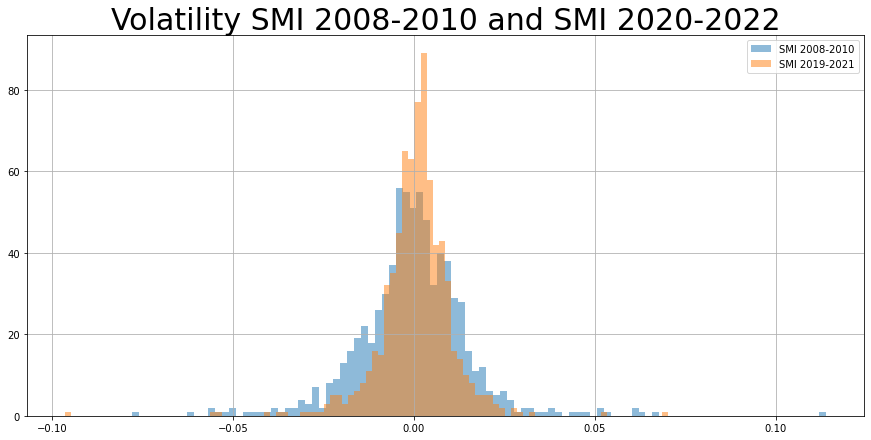

In [41]:
SMI_08["returns"] = (SMI_08["Close"]/SMI_08["Close"].shift(1)) -1
SMI_19["returns"] = (SMI_19["Close"]/SMI_19["Close"].shift(1)) -1
SMI_08["returns"].hist(bins = 100, label = "SMI 2008-2010", alpha = 0.5, figsize = (15,7))
SMI_19["returns"].hist(bins = 100, label = "SMI 2019-2021", alpha = 0.5)
plt.legend()
plt.title("Volatility SMI 2008-2010 and SMI 2020-2022", fontsize = 30)



# Comparison standard deviation SMI 2008-2010 and SMI 2022-2022

In [40]:
std_SMI_08= (SMI_08["Close"].std())
std_SMI_19= (SMI_19["Close"].std())
print(std_SMI_08)
print(std_SMI_19)


769.6229093477947
1007.6800858715435


# Value at Risk von 5 auserwählten Titel des SMI during Financial Crisis 2008-2010

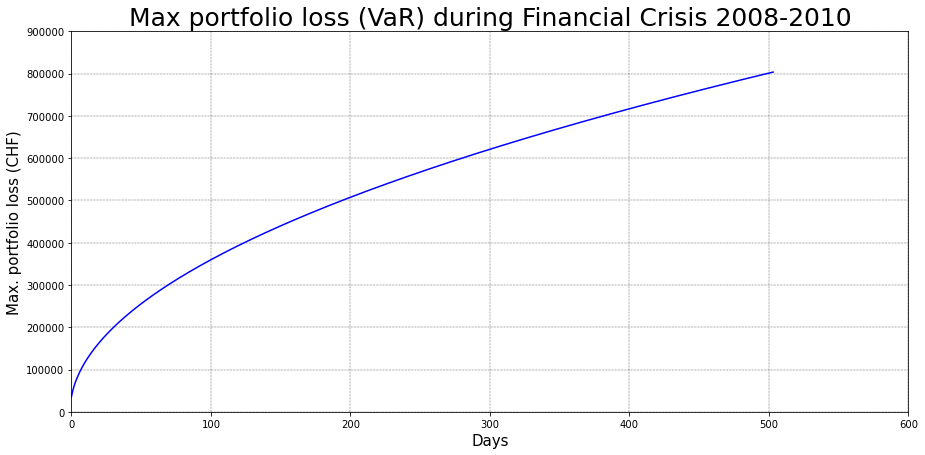

In [22]:
from pandas_datareader import data as pdr
from scipy.stats import norm
portfolio_08 = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
weights_08 = np.array([.2, .2, .2, .2, .2])
investment_08 = 1000000
start_08 = datetime(2008,1,1)
end_08 = datetime(2010,12,31)
df_08 = pdr.get_data_yahoo(portfolio_08, start_08, end_08) ["Close"]
returns_08 = df_08.pct_change()

# Generate Var-Cov matrix (Kovarianzmatrix)
cov_matrix_08 = returns_08.cov()
#print(cov_matrix)

#calculate mean returns of the stocks
mean_returns_08 = returns_08.mean()

#calculate mean returns for the portfolio and normalize against investments weights
mean_portfolio_08 = mean_returns_08.dot(weights_08)

#Standard deviation of the portfolio
std_portfolio_08 = np.sqrt(weights_08.T.dot(cov_matrix_08).dot(weights_08))

#Mean of investment
mean_investment_08 = (1+mean_portfolio_08) * investment_08

#Standard deviation of investment
std_investment_08 = investment_08 * std_portfolio_08

#Konfidenzintervall (95%)
conf_level_08 = 0.05
var_cutoff_08 = norm.ppf(conf_level_08, mean_investment_08, std_investment_08) #normal cumulatice distribution
Var_08 = investment_08 - var_cutoff_08
#print(Var_08)


#Calculate VaR over 2 Years
import matplotlib.pyplot as plt
Var_array_08= []
days_08 = int(504)
for x in range(1, days_08+1):
    Var_array_08.append(np.round(Var_08 * np.sqrt(x), 2))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(Var_08 * np.sqrt(x), 2))) # acitvate code to see VaR over 2 years

plt.figure(figsize=(15,7))
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Max. portfolio loss (CHF)", fontsize = 15)
plt.xlim(0,600)
plt.ylim(0,900000)
plt.title("Max portfolio loss (VaR) during Financial Crisis 2008-2010", fontsize = 25)
plt.plot(Var_array_08, "b")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)




# Checking distributions of equities against normal distribution
# 5 Titel im Portfolio vs Normalverteilung während der COVID-19 Pandemie

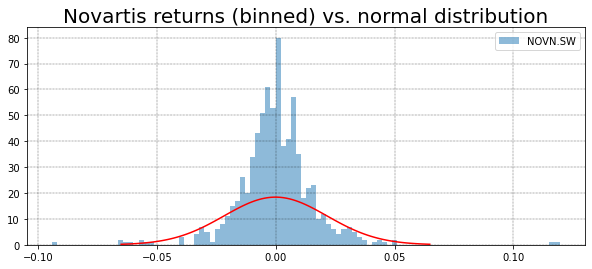

In [82]:

#Checking distributions of equities against normal distribution
import matplotlib.pyplot as plt
import scipy as scipy
returns_08["NOVN.SW"].hist(bins = 100, label = "NOVN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Novartis returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()



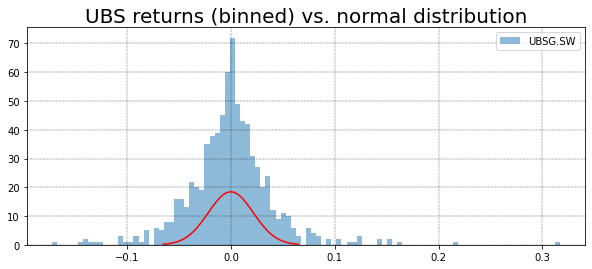

In [68]:
returns_08["UBSG.SW"].hist(bins = 100, label = "UBSG.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("UBS returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

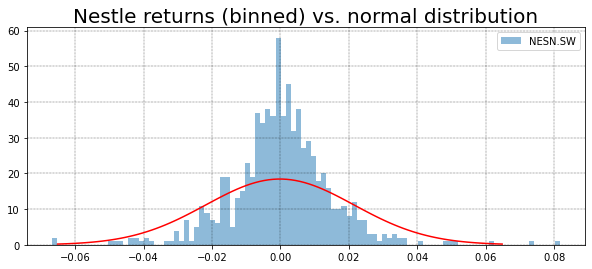

In [69]:
returns_08["NESN.SW"].hist(bins = 100, label = "NESN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Nestle returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

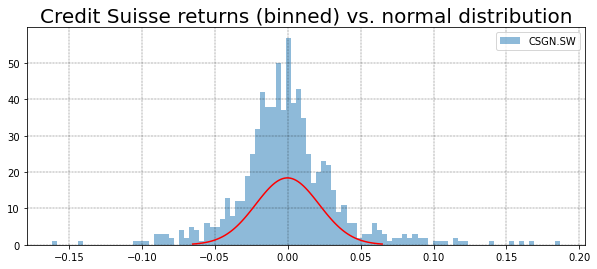

In [70]:
returns_08["CSGN.SW"].hist(bins = 100, label = "CSGN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Credit Suisse returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

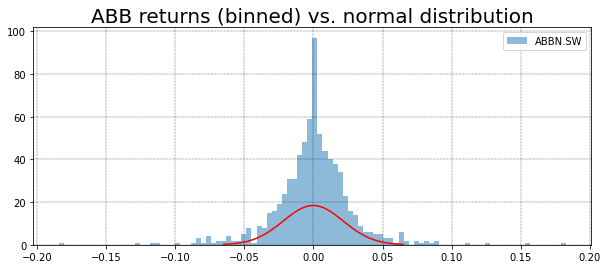

In [71]:
returns_08["ABBN.SW"].hist(bins = 100, label = "ABBN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("ABB returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

# Value at Risk von 5 auserwählten Titel des SMI during COVID-19 2020-2021

In [27]:
portfolio_20 = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
weights_20 = np.array([.2, .2, .2, .2, .2])
investment_20 = 1000000
start_20 = datetime(2020,1,1)
end_20 = datetime(2021,12,31)
df_20 = pdr.get_data_yahoo(portfolio_20, start_20, end_20) ["Close"]
returns_20 = df_20.pct_change()
#print(returns)

# Generate Var-Cov matrix (Kovarianzmatrix)
cov_matrix_20 = returns_20.cov()
#print(cov_matrix)

#calculate mean returns of the stocks
mean_returns_20 = returns_20.mean()

#calculate mean returns for the portfolio and normalize against investments weights
mean_portfolio_20 = mean_returns_20.dot(weights_20)

#Standard deviation of the portfolio
std_portfolio_20 = np.sqrt(weights_20.T.dot(cov_matrix_20).dot(weights_20))

#Mean of investment
mean_investment_20 = (1+mean_portfolio_20) * investment_20

#Standard deviation of investment
std_investment_20 = investment_20 * std_portfolio_20

#Konfidenzintervall (95%)
conf_level_20 = 0.05
var_cutoff_20 = norm.ppf(conf_level_20, mean_investment_20, std_investment_20) #normal cumulatice distribution
Var = investment_20 - var_cutoff_20
print(Var)




24414.778192584636


In [25]:
#Calculate VaR over 2 Years
import matplotlib.pyplot as plt
Var_array_20= []
days_20 = int(504)
for x in range(1, days_20+1):
    Var_array_20.append(np.round(Var * np.sqrt(x), 2))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(Var * np.sqrt(x), 2))) # acitvate code to see VaR over 2 years


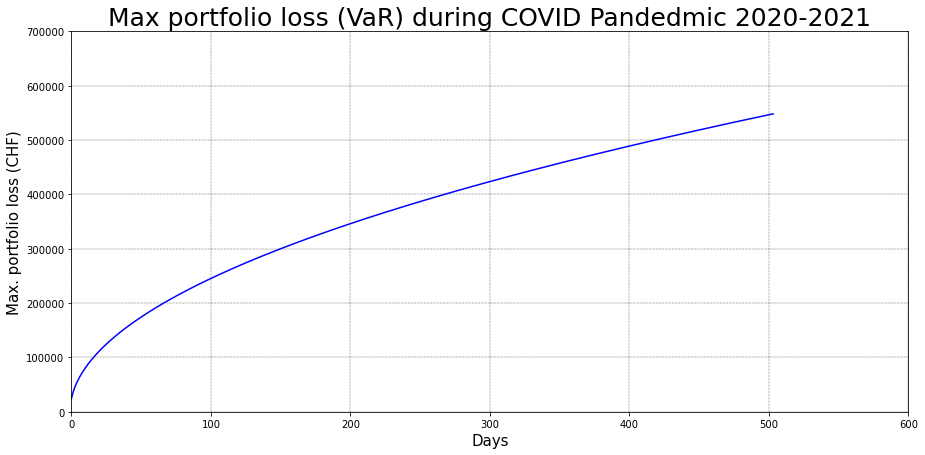

In [26]:
#plot
plt.figure(figsize=(15,7))
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Max. portfolio loss (CHF)", fontsize = 15)
plt.xlim(0,600)
plt.ylim(0,700000)
plt.title("Max portfolio loss (VaR) during COVID Pandedmic 2020-2021", fontsize = 25)
plt.plot(Var_array_20, "b")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)

# Checking distributions of equities against normal distribution
# 5 Titel im Portfolio vs Normalverteilung während der COVID-19 Pandemie

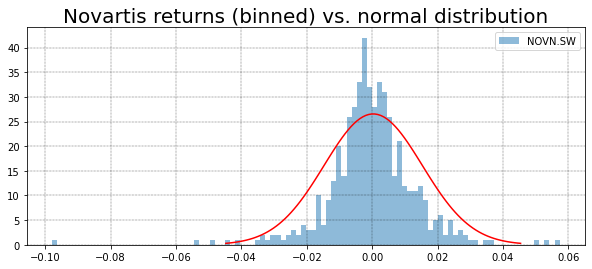

In [75]:
returns_20["NOVN.SW"].hist(bins = 100, label = "NOVN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_20 - 3* std_portfolio_20, mean_portfolio_20 +3 *std_portfolio_20,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_20, std_portfolio_20), "r")
plt.title("Novartis returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

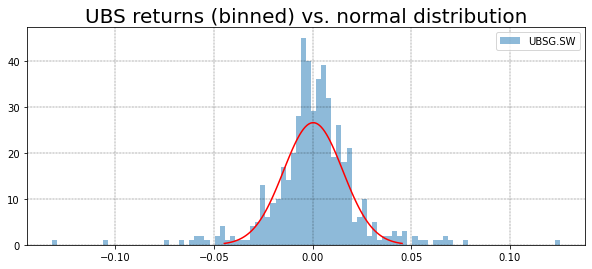

In [76]:
returns_20["UBSG.SW"].hist(bins = 100, label = "UBSG.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_20 - 3* std_portfolio_20, mean_portfolio_20 +3 *std_portfolio_20,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_20, std_portfolio_20), "r")
plt.title("UBS returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

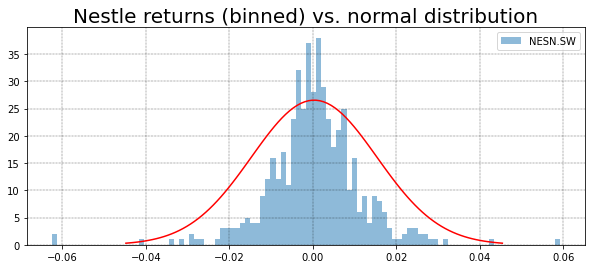

In [77]:
returns_20["NESN.SW"].hist(bins = 100, label = "NESN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_20 - 3* std_portfolio_20, mean_portfolio_20 +3 *std_portfolio_20,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_20, std_portfolio_20), "r")
plt.title("Nestle returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

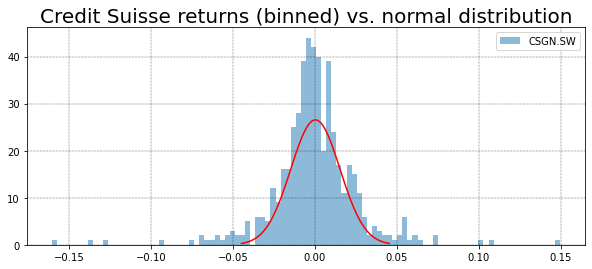

In [78]:
returns_20["CSGN.SW"].hist(bins = 100, label = "CSGN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_20 - 3* std_portfolio_20, mean_portfolio_20 +3 *std_portfolio_20,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_20, std_portfolio_20), "r")
plt.title("Credit Suisse returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

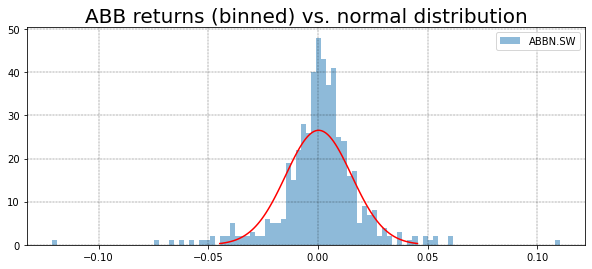

In [79]:
returns_20["ABBN.SW"].hist(bins = 100, label = "ABBN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_20 - 3* std_portfolio_20, mean_portfolio_20 +3 *std_portfolio_20,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_20, std_portfolio_20), "r")
plt.title("ABB returns (binned) vs. normal distribution", fontsize = (20))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()

# Reflection

# Refernces
yfinance